In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing our Mall Dataset

dataset = pd.read_csv(r"D:\self learning\Machine_Learning_AZ_Template_Folder\Machine Learning A-Z Template Folder\Part 4 - Clustering\Section 24 - K-Means Clustering\K_Means\Mall_Customers.csv")

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.count()

CustomerID                200
Genre                     200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [7]:
# Since there are no missing values we will directly move on to applying KMeans 

from sklearn.cluster import KMeans
X = dataset.iloc[:,[3,4]]


In [13]:
# Finding the number of clusters by the ELBOW method

wcss = []


for i in range(1,10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    iner = kmeans.inertia_
    wcss.append(iner)

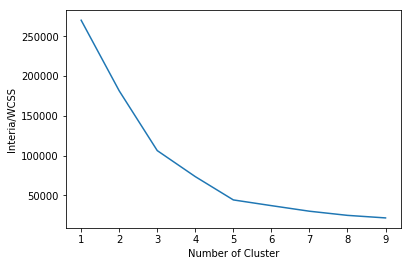

In [26]:
# Plotting the Elbow graph

plt.plot(range(1,10) , wcss)
plt.xlabel("Number of Cluster")
plt.ylabel("Interia/WCSS")
plt.show()

In [30]:
# We can see that the cluster 5 is the best with the least squared sum of errors , so we choose cluster 5

kmeans = KMeans(n_clusters = 5)
dataset['Cluster'] = kmeans.fit_predict(X)
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


In [39]:
#Renaming the column names for our ease

dataset.columns
dataset = dataset.rename(columns = {"Annual Income (k$)" : "Annual_Income",
                           "Spending Score (1-100)" : "Spending_Score"} )
dataset.head()


,CustomerID,Genre,Age,Annual_Income,Spending_Score,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


In [59]:
#Finding the coordinates of the cluster to plot 

kmeans.cluster_centers_

array([[ 55.2962963 ,  49.51851852],
       [ 25.72727273,  79.36363636],
       [ 88.2       ,  17.11428571],
       [ 86.53846154,  82.12820513],
       [ 26.30434783,  20.91304348]])

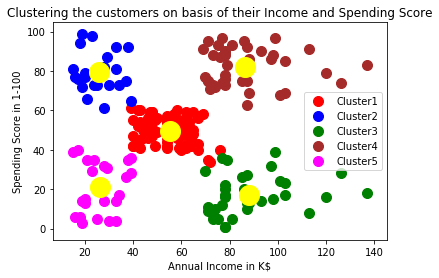

In [61]:
# Lets visualize the clusters for some information

plt.scatter(x = dataset.loc[dataset.Cluster == 0 , 'Annual_Income'].values , y = dataset.loc[dataset.Cluster == 0 , 'Spending_Score'].values , s = 100 , c = 'red' , label = "Cluster1" )
plt.scatter(x = dataset.loc[dataset.Cluster == 1 , 'Annual_Income'].values , y = dataset.loc[dataset.Cluster == 1 , 'Spending_Score'].values , s = 100 , c = 'blue' , label = "Cluster2" )
plt.scatter(x = dataset.loc[dataset.Cluster == 2 , 'Annual_Income'].values , y = dataset.loc[dataset.Cluster == 2 , 'Spending_Score'].values , s = 100 , c = 'green' , label = "Cluster3" )
plt.scatter(x = dataset.loc[dataset.Cluster == 3 , 'Annual_Income'].values , y = dataset.loc[dataset.Cluster == 3 , 'Spending_Score'].values , s = 100 , c = 'brown' , label = "Cluster4" )
plt.scatter(x = dataset.loc[dataset.Cluster == 4 , 'Annual_Income'].values , y = dataset.loc[dataset.Cluster == 4 , 'Spending_Score'].values , s = 100 , c = 'magenta' , label = "Cluster5")
plt.scatter(x = kmeans.cluster_centers_[:,0] , y = kmeans.cluster_centers_[:,1] , s = 400 , c = 'yellow')
plt.xlabel('Annual Income in K$')
plt.ylabel('Spending Score in 1-100')
plt.title("Clustering the customers on basis of their Income and Spending Score")
plt.legend()
plt.show()